# Preprocessing

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from apyori import apriori
import numpy as np

from sklearn.preprocessing import LabelEncoder

## Import data

### Main dataset

In [205]:
# main dataset
laundry = pd.read_csv('LaundryData.csv') 
laundry.columns = map(str.upper, laundry.columns)
laundry

,NO,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


### Additional dataset

In [206]:
# import additional dataset: Taman perumahan by state = kel, n9,phg, prk
residentsKelantan = pd.read_excel('TamanPerumahan/KELANTAN.xlsx', skiprows=3)
residentsKelantan = residentsKelantan.iloc[:563,:]
display(residentsKelantan)
residentsPerak = pd.read_excel('TamanPerumahan/PENGKALANHULU.xlsx', skiprows=3)
residentsPerak = residentsPerak.iloc[:23,:]
display(residentsPerak)
residentsPahang = pd.read_excel('TamanPerumahan/PAHANG.xlsx', skiprows=2)
residentsPahang = residentsPahang.iloc[:40,:]
display(residentsPahang)
residentsN9 = pd.read_csv('TamanPerumahan/NEGERISEMBILAN.csv', encoding='cp1252')
display(residentsN9)

,JAJAHAN,PBT,NAMA PERUMAHAN,LATITUDE,LONGITUDE,BIL RUMAH (UNIT)
0,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Mesra,4.875802,101.962055,193.0
1,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Wangsa Mewangi,4.872028,101.964018,231.0
2,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Bandar Baru,4.863622,101.959529,65.0
3,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Wisma Sri Galas,4.86336,101.961087,89.0
4,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Titiwangsa,4.862772,101.954591,252.0
...,...,...,...,...,...,...
558,TUMPAT,MAJLIS DAERAH TUMPAT,TAMAN SRI CAHAYA,"6° 8'27.66""N","102°10'0.28""E",10.0
559,TUMPAT,MAJLIS DAERAH TUMPAT,TAMAN SRI PINANG,"6°10'29.64""N","102°13'45.23""E",81.0
560,TUMPAT,MAJLIS DAERAH TUMPAT,TAMAN DESA JAMBU,"6° 9'35.66""N","102°13'6.11""E",40.0
561,TUMPAT,MAJLIS DAERAH TUMPAT,PERUMAHAN KG. KUBANG PANJANG,"6°10'5.13""N","102° 8'37.92""E",5.0


,BIL,NAMA TAMAN,KATEGORI RUMAH,BILANGAN UNIT,JENIS RUMAH
0,1.0,Taman Sentosa (RPA 1),Rendah,50,Teres Setingkat
1,2.0,Taman Damai (RPA 2),Rendah,40,Teres Setingkat
2,3.0,Taman Aman (RPA 3),Rendah,96,Teres Setingkat
3,4.0,Taman Bersatu,Sederhana,35,Teres Setingkat
4,5.0,Taman Mawar,Rendah,26,Teres Setingkat
5,6.0,Taman Sri Jaya,Sederhana,28,Teres Setingkat
6,7.0,Taman Kroh Indah,Rendah,44,Teres Setingkat
7,8.0,Taman Tembusu,Rendah,52,Teres Setingkat
8,9.0,Taman Dato' Seri Lam Kok Loong,Rendah,28,Teres Setingkat
9,10.0,Taman Sri Kroh,Rendah,128,Teres Setingkat


,NO,NAMA TAMAN,MUKIM,POSKOD,BILANGAN RUMAH
0,1.0,Taman Maran Impian,MARAN,26500.0,141
1,2.0,Taman Sri Chedong,MARAN,26500.0,111
2,3.0,Taman Maran Jaya,MARAN,26500.0,298
3,4.0,Taman Sri Keramat,MARAN,26500.0,184
4,5.0,Taman Berkat Mutiara,MARAN,26500.0,36
5,6.0,Taman Muda Jaya,MARAN,26500.0,67
6,7.0,Taman Keramat Makmur,MARAN,26500.0,46
7,8.0,Taman Maran Damai,MARAN,26500.0,147
8,9.0,Rumah Murah (Kilat),MARAN,26500.0,33
9,10.0,Taman Keramat Makmur 2,MARAN,26500.0,30


,Bil,Nama Taman,Daerah,Mukim,Poskod,Bilangan Rumah
0,1,TAMAN SHUKOR,Seremban,AMPANGAN,70400,43
1,2,TAMAN DESA KENANGA INDAH,Seremban,AMPANGAN,70400,30
2,3,TAMAN VILLA PALMA,Seremban,AMPANGAN,70400,56
3,4,TAMAN SERI SENTOSA,Seremban,AMPANGAN,70400,28
4,5,RESIDENSI SIGC,Seremban,AMPANGAN,70400,217
...,...,...,...,...,...,...
1116,1117,TAMAN PEDAS PERDANA,Rembau,PEKAN MERBAU SEMBILAN,"71,400",512
1117,1118,TAMAN PINGGIRAN PEDAS,Rembau,PEDAS,"71,400",419
1118,1119,TAMAN DESA PERMAI KUNDUR,Rembau,PEDAS,"71,400",187
1119,1120,TAMAN AKASIA KUNDUR,Rembau,PEDAS,"71,400",50


## Preprocessing main dataset

### 2. Is there any missing values or duplicates data? If so, how do we want to deal with it?
Dealing null and duplicates data

In [207]:
# dearling wih missing values
laundry.isna().sum()

NO                0
DATE              0
TIME              0
RACE             10
GENDER           14
BODY_SIZE        17
AGE_RANGE         8
WITH_KIDS        13
KIDS_CATEGORY    30
BASKET_SIZE       6
BASKET_COLOUR     9
ATTIRE           31
SHIRT_COLOUR      9
SHIRT_TYPE       37
PANTS_COLOUR      5
PANTS_TYPE        9
WASH_ITEM        23
WASHER_NO         0
DRYER_NO          0
SPECTACLES        0
dtype: int64

In [208]:
# drop rows with null values
laundry = laundry.dropna()

In [209]:
# dealing with duplicates data
laundry = laundry.drop_duplicates()

In [210]:
laundry['TIME'] = pd.to_datetime(laundry['TIME']).dt.time
laundry['DATE'] = pd.to_datetime(laundry['DATE'], format='%d/%m/%Y', errors='coerce')


In [211]:
# Binning time into day and night 
# night = 7pm - 7am, day = 7am - 6.59pm
bins = ['19:00:00','07:00:00','18:59:59']
labels = ["Night","Day","Night"]

hours = pd.to_datetime(laundry['TIME'], format='%H:%M:%S').dt.hour
laundry['PART_OF_DAY'] = pd.cut(hours,  bins=[0,7,19,24], include_lowest=True,  labels=labels,ordered=False)

In [212]:
# Binning date into days
days = laundry['DATE'].dt.dayofweek #gives only the index(0-monday,6-sunday)
mappingtoDays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

laundry['PART_OF_WEEK'] = days
laundry['PART_OF_WEEK'] = laundry['PART_OF_WEEK'].map(mappingtoDays)

In [213]:
# Binning age into young, adult, senior citizen
laundry["AGE_CATEGORY"] = pd.cut(laundry["AGE_RANGE"], bins=[1,30,45,70], labels=["Young","Adults","Older adults"])

### 5. Is there any outliers in the data? Is the outliers an error or else?
Outlier analysis


In [214]:
fig = px.box(laundry, x="GENDER", y='AGE_RANGE')
fig.show()

## Preprocessing Additional Dataset

### 1. Is there any missing values or duplicates data? If so, how we want to deal with it?
Dealing null and duplicates data

In [215]:
print("Resident Negeri Sembilan:")
display(residentsN9.isna().sum())
print("Resident Pahang:")
display(residentsPahang.isna().sum())
print("Resident Perak:")
display(residentsPerak.isna().sum())
print("Resident Kelantan:")
display(residentsKelantan.isna().sum())

Resident Negeri Sembilan:


Bil               0
Nama Taman        0
Daerah            0
Mukim             0
Poskod            0
Bilangan Rumah    0
dtype: int64

Resident Pahang:


NO                0
NAMA TAMAN        0
MUKIM             0
POSKOD            0
BILANGAN RUMAH    0
dtype: int64

Resident Perak:


BIL               0
NAMA TAMAN        0
KATEGORI RUMAH    1
BILANGAN UNIT     0
JENIS RUMAH       2
dtype: int64

Resident Kelantan:


JAJAHAN             0
PBT                 0
NAMA PERUMAHAN      0
LATITUDE            0
LONGITUDE           0
BIL RUMAH (UNIT)    0
dtype: int64

### 2. How to visualize the content?
Merging dataset into one dataframe

In [216]:
# Declare dataframe for additional dataset
residentalLocation = pd.DataFrame(columns=['STATE','RESIDENTAL_AREA','DISTRICT','NUMBER_OF_HOUSES'])

,STATE,RESIDENTAL_AREA,DISTRICT,NUMBER_OF_HOUSES


In [217]:
# add Negeri sembilan
for i in range(len(residentsN9)):
    residentalLocation = residentalLocation.append({'STATE': 'Negeri Sembilan', 'RESIDENTAL_AREA': residentsN9.iloc[[i]]['Nama Taman'].values[0],'DISTRICT': residentsN9.iloc[[i]]['Daerah'].values[0],'NUMBER_OF_HOUSES':residentsN9.iloc[[i]]['Bilangan Rumah'].values[0]}, ignore_index=True)

# add Kelantan
for i in range(len(residentsKelantan)):
    residentalLocation = residentalLocation.append({'STATE': 'Kelantan', 'RESIDENTAL_AREA': residentsKelantan.iloc[[i]]['NAMA PERUMAHAN'].values[0],'DISTRICT': residentsKelantan.iloc[[i]]['JAJAHAN'].values[0],'NUMBER_OF_HOUSES':residentsKelantan.iloc[[i]]['BIL RUMAH (UNIT)'].values[0]}, ignore_index=True)

# add Pahang
for i in range(len(residentsPahang)):
    residentalLocation = residentalLocation.append({'STATE': 'Pahang', 'RESIDENTAL_AREA': residentsPahang.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': residentsPahang.iloc[[i]]['MUKIM'].values[0],'NUMBER_OF_HOUSES':residentsPahang.iloc[[i]]['BILANGAN RUMAH'].values[0]}, ignore_index=True)

# add Perak
for i in range(len(residentsPerak)):
    residentalLocation = residentalLocation.append({'STATE': 'Perak', 'RESIDENTAL_AREA': residentsPerak.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': 'Pengkalan Hulu','NUMBER_OF_HOUSES':residentsPerak.iloc[[i]]['BILANGAN UNIT'].values[0]}, ignore_index=True)


In [218]:
residentalLocation

,STATE,RESIDENTAL_AREA,DISTRICT,NUMBER_OF_HOUSES
0,Negeri Sembilan,TAMAN SHUKOR,Seremban,43
1,Negeri Sembilan,TAMAN DESA KENANGA INDAH,Seremban,30
2,Negeri Sembilan,TAMAN VILLA PALMA,Seremban,56
3,Negeri Sembilan,TAMAN SERI SENTOSA,Seremban,28
4,Negeri Sembilan,RESIDENSI SIGC,Seremban,217
...,...,...,...,...
1742,Perak,Taman Sri Bayas,Pengkalan Hulu,66
1743,Perak,Taman Intan (RPA Klian Intan),Pengkalan Hulu,50
1744,Perak,RPA Klian Intan 2,Pengkalan Hulu,53
1745,Perak,Taman Bunga Raya,Pengkalan Hulu,30


In [219]:
residentalLocation['NUMBER_OF_HOUSES'] = pd.to_numeric(residentalLocation['NUMBER_OF_HOUSES'], errors='coerce')
residentalLocation = residentalLocation.dropna()

### 4. Are there any outliers in the data? Is the outliers an error or else?
Outlier analysis

In [220]:
df = px.data.tips()
fig = px.box(residentalLocation, x="STATE", y="NUMBER_OF_HOUSES")
fig.show()

# Exploratory Data Analysis

In [221]:
laundryAnalaysis = laundry.copy()
residentalLocationAnalysis = residentalLocation.copy()

### 1. How many customers visit during the day and night?

In [222]:
### 1. How many customers visit during the day and night?
bb = laundryAnalaysis.groupby(['DATE','PART_OF_DAY']).size().reset_index()
bb.rename(columns={0: 'FREQUENCY'}, inplace=True)


fig = px.bar(bb, x="DATE", y="FREQUENCY",
             color="PART_OF_DAY", hover_data=['FREQUENCY'],
             barmode = 'group')
   
fig.show()
print('Frequency of customer during the day: ', bb[bb['PART_OF_DAY']=='Day'].sum())
print('Frequency of customer during the night: ', bb[bb['PART_OF_DAY']=='Night'].sum())

Frequency of customer during the day:  FREQUENCY    299
dtype: int64
Frequency of customer during the night:  FREQUENCY    343
dtype: int64


### 2. What type of customer visits laundry on weekend, weekdays, night and day ?

#### CUSTOMER TYPE BASED ON: AGE CATEGORY
##### weekend weekdays

In [301]:
ld2 = laundry.copy()

mappingtoWW = {'Monday': 'Weekdays','Tuesday': 'Weekdays','Wednesday': 'Weekdays','Thursday': 'Weekdays','Friday': 'Weekdays','Saturday': 'Weekend','Sunday': 'Weekend'}

ld2['WW'] = laundry['PART_OF_WEEK'].map(mappingtoWW)

In [302]:
# groupby age
ac_ww = ld2.groupby(['WW','AGE_CATEGORY']).size().reset_index()
ac_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

# display result
print("age range information : ")
print("YOUNG : < 30")
print("ADULTS : 30 - 44")
print("OLDER ADULTS : > 44")
chartAge1 = alt.Chart(ac_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('AGE_CATEGORY', scale=alt.Scale(range=["#581845","#C70039", "#FFC300"]))
).properties(
    width=250  
)

chartAge1

age range information : 
YOUNG : < 30
ADULTS : 30 - 44
OLDER ADULTS : > 44


alt.Chart(...)

##### Day and Night

In [303]:
ac_dn = ld2.groupby(['AGE_CATEGORY','RACE']).size().reset_index()
ac_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartAge2 = alt.Chart(ac_dn).mark_bar().encode(
    x='AGE_CATEGORY',
    y='FREQUENCY',
    color=alt.Color('RACE', scale=alt.Scale(range=["#87F5D7","#87F5A0", "#F5A087", "#F5D787"]))
).properties(
    width=250  
)
chartAge2

alt.Chart(...)

#### CUSTOMER TYPE BASED ON: RACE
##### Weekend Weekdays

In [304]:
r_ww = ld2.groupby(['WW','RACE']).size().reset_index()
r_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartrace1 = alt.Chart(r_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('RACE', scale=alt.Scale(range=["#87F5D7","#87F5A0", "#F5A087", "#F5D787"]))
).properties(
    width=250  
)
chartrace1

alt.Chart(...)

##### Day and Night

In [305]:
r_dn = ld2.groupby(['PART_OF_DAY','RACE']).size().reset_index()
r_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartrace2 = alt.Chart(r_dn).mark_bar().encode(
    x='PART_OF_DAY',
    y='FREQUENCY',
    color=alt.Color('RACE', scale=alt.Scale(range=["#87F5D7","#87F5A0", "#F5A087", "#F5D787"]))
).properties(
    width=250  
)

chartrace2

alt.Chart(...)

#### CUSTOMER TYPE BASED ON: GENDER
##### Weekend and Weekdays

In [306]:
g_ww = ld2.groupby(['WW','GENDER']).size().reset_index()
g_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartGender1 = alt.Chart(g_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('GENDER', scale=alt.Scale(range=["#FF5733", "#DAF7A6"]))
).properties(
    width=250  
)


chartGender1

alt.Chart(...)

##### Day and Night

In [307]:
g_dn = ld2.groupby(['PART_OF_DAY','GENDER']).size().reset_index()
g_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartGender2 = alt.Chart(g_dn).mark_bar().encode(
    x='PART_OF_DAY',
    y='FREQUENCY',
    color=alt.Color('GENDER', scale=alt.Scale(range=["#FF5733", "#DAF7A6"]))
).properties(
    width=250  
)


chartGender2

alt.Chart(...)

#### CUSTOMER TYPE BASED ON: CUSTOMER WITH KIDS
##### Weekend and Weekdays

In [308]:
k_ww = ld2.groupby(['WW','WITH_KIDS']).size().reset_index()
k_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartWkids1 = alt.Chart(k_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('WITH_KIDS', scale=alt.Scale(range=["#F5D787", "#A5F587"]))
).properties(
    width=250  
)


chartWkids1

alt.Chart(...)

##### Days and Night

In [309]:
k_dn = ld2.groupby(['PART_OF_DAY','WITH_KIDS']).size().reset_index()
k_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartWkids2 = alt.Chart(k_dn).mark_bar().encode(
    x='PART_OF_DAY',
    y='FREQUENCY',
    color=alt.Color('WITH_KIDS', scale=alt.Scale(range=["#F5D787", "#A5F587"]))
).properties(
    width=250  
)


chartWkids2

alt.Chart(...)

#### CLUSTERING - AGE RANGE

In [310]:
cluster_data = ld2[['PART_OF_DAY','AGE_RANGE']]

In [311]:
X = pd.get_dummies(cluster_data['PART_OF_DAY'], drop_first=False)

In [235]:
X.columns = X.columns.add_categories('AGE_RANGE')
X['AGE_RANGE'] =cluster_data['AGE_RANGE']

In [236]:
from sklearn.cluster import KMeans 

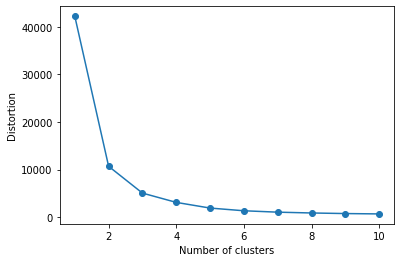

In [237]:
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#elbow

In [312]:
km = KMeans(n_clusters = 3, random_state=0)
km.fit(X)

KMeans(n_clusters=3, random_state=0)

In [313]:
cluster_data_new = cluster_data.copy()
cluster_data_new.insert(0, "cluster", km.labels_, True)

In [314]:
cluster_0 = cluster_data_new[cluster_data_new['cluster'] == 0]
cluster_1 = cluster_data_new[cluster_data_new['cluster'] == 1]
cluster_2 = cluster_data_new[cluster_data_new['cluster'] == 2]

In [315]:
mappingtoplot2 = {0: '48 - 55', 1: '28 - 37', 2: '38 - 47'}

cluster_data_plot = cluster_data_new.copy()
cluster_data_plot['cluster'] = cluster_data_plot['cluster'].map(mappingtoplot2)

chart = alt.Chart(cluster_data_plot).mark_bar().encode(
    alt.X('cluster', axis=alt.Axis(title=None, labels=False)),
    alt.Y('count(AGE_RANGE)'),
    alt.Column('PART_OF_DAY'),
    alt.Color('cluster', scale=alt.Scale(range=["#AAFF00","#097969", "#454B1B"]))
).properties(
    width=200  
)
chart

alt.Chart(...)

### 3. What is the common attire worn by the customer (attire, shirt color, shirt type, pants color, pants type)?

In [316]:
customerAttire = laundry.copy()

attire = customerAttire['ATTIRE'].value_counts().reset_index()
attire = attire.rename(columns={'index':'ATTIRE', 'ATTIRE':'FREQUENCY'})
fig = px.bar(attire, x='ATTIRE', y='FREQUENCY',title="Distribution of Attire") 
fig.show()

In [317]:
unique_clothes = customerAttire[['SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE']].values.ravel()
unique_clothes = pd.unique(unique_clothes)

In [318]:
customerAttire['SHIRT_COLOUR'] = customerAttire['SHIRT_COLOUR'].astype(str) + '_shirt'
customerAttire['PANTS_COLOUR'] = customerAttire['PANTS_COLOUR'].astype(str) + '_pants'
customerAttire['PANTS_TYPE'] = customerAttire['PANTS_TYPE'].astype(str) + '_pants'

In [319]:
def top5clothes(df) : 
    customerClothes = df[['SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE']]
    records = []
    count_row = customerClothes.shape[0]
    for i in range(0, count_row):
        records.append([str(customerClothes.values[i,j]) for j in range(0, 4)])
        
    association_rules = apriori(records, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 3)
    association_result = list(association_rules)

    cnt =0

    for item in association_result:
        cnt += 1
        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(round(item[1],3)))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(round(item[2][0][2],4)))
        print("Lift: " + str(round(item[2][0][3],4)))
        print("=====================================")

        if cnt > 4: break

In [320]:
casual = customerAttire[customerAttire['ATTIRE'] == 'casual'].reset_index()
formal = customerAttire[customerAttire['ATTIRE'] == 'formal'].reset_index()
traditional = customerAttire[customerAttire['ATTIRE'] == 'traditional'].reset_index()

Casual

In [321]:
print ('Casual Attire')
print("=====================================")
casualAttire = top5clothes(casual)
print (casualAttire)

Casual Attire
(Rule 1) long sleeve -> brown_shirt
Support: 0.026
Confidence: 0.4333
Lift: 3.0155
(Rule 2) green_shirt -> pink_pants
Support: 0.01
Confidence: 0.4167
Lift: 6.0476
(Rule 3) purple_shirt -> purple_pants
Support: 0.006
Confidence: 0.25
Lift: 7.0556
(Rule 4) long sleeve -> brown_shirt
Support: 0.016
Confidence: 0.2667
Lift: 3.8705
(Rule 5) long sleeve -> black_pants
Support: 0.008
Confidence: 0.3333
Lift: 4.8381
None


Formal

In [322]:
print ('Formal Attire')
print("=====================================")
formalAttire = top5clothes(formal)
print (formalAttire)

Formal Attire
(Rule 1) blue_pants -> brown_shirt
Support: 0.025
Confidence: 0.2222
Lift: 8.7778
(Rule 2) brown_pants -> grey_shirt
Support: 0.013
Confidence: 0.25
Lift: 4.9375
(Rule 3) brown_pants -> orange_shirt
Support: 0.025
Confidence: 0.5
Lift: 6.5833
(Rule 4) grey_pants -> red_shirt
Support: 0.025
Confidence: 0.2857
Lift: 3.2245
(Rule 5) pink_pants -> pink_shirt
Support: 0.025
Confidence: 1.0
Lift: 9.875
None


Traditional

In [323]:
print ('Traditional Attire')
print("=====================================")
traditionalAttire = top5clothes(traditional)
print (traditionalAttire)

Traditional Attire
(Rule 1) black_shirt -> black_pants
Support: 0.073
Confidence: 0.3333
Lift: 4.5833
(Rule 2) blue_pants -> blue_shirt
Support: 0.091
Confidence: 0.3846
Lift: 3.5256
(Rule 3) brown_pants -> brown_shirt
Support: 0.073
Confidence: 1.0
Lift: 4.2308
(Rule 4) green_shirt -> green_pants
Support: 0.036
Confidence: 1.0
Lift: 11.0
(Rule 5) grey_pants -> grey_shirt
Support: 0.055
Confidence: 1.0
Lift: 18.3333
None


### 4. Customers wear short sleeves during the day and long sleeves during the night. Prove the hypothesis

In [324]:
shirt = laundry.groupby(['PART_OF_DAY', 'SHIRT_TYPE']).size().reset_index()
shirt = shirt.rename(columns={0:'FREQUENCY'})


In [325]:
alt.Chart(shirt).mark_bar().encode(
    x='PART_OF_DAY:O',
    y='FREQUENCY:Q',
    color='SHIRT_TYPE:N',
    column='SHIRT_TYPE:N'
)


alt.Chart(...)

### 5. Frequency usage for washer and dryer per month

#### WASHER

In [326]:
temp = laundryAnalaysis.copy()
temp['WASHER_NO'] = temp['WASHER_NO'].apply(lambda x: 1)
temp['DRYER_NO'] = temp['DRYER_NO'].apply(lambda x: 1)
temp['MONTH'] = temp['DATE'].dt.month

a = temp[temp['MONTH']==11].groupby(['DATE','WASHER_NO']).size().unstack()
a.reset_index(inplace=True)
a.rename(columns={'DATE': 'DATE', 1: 'FREQUENCY'}, inplace=True)

print('Frequency of washer used per month is: ', a['FREQUENCY'].sum())
alt.Chart(a).mark_bar().encode(
    x='DATE',
    y='FREQUENCY',
)

Frequency of washer used per month is:  512


alt.Chart(...)

#### DRYER

In [327]:
b = temp[temp['MONTH']==11].groupby(['DATE','DRYER_NO']).size().unstack()
b.reset_index(inplace=True)
b.rename(columns={'DATE': 'DATE', 1: 'FREQUENCY'}, inplace=True)

print('Frequency of dryer used per month is: ', b['FREQUENCY'].sum())
alt.Chart(b).mark_bar().encode(
    x='DATE',
    y='FREQUENCY',
)

Frequency of dryer used per month is:  512


alt.Chart(...)

### 6. Which dryer and washing machine are frequently used together? 

In [328]:
import warnings
warnings.filterwarnings("ignore")
washerAndDryer = laundryAnalaysis[['WASHER_NO','DRYER_NO']]
washerAndDryer['WASHER_NO'] = 'WASHER ' + washerAndDryer['WASHER_NO'].astype(str)
washerAndDryer['DRYER_NO'] = 'DRYER ' + washerAndDryer['DRYER_NO'].astype(str)
records = washerAndDryer.values.tolist()

In [329]:
# apply apriori algorithm with support = 0.45%, confidence =20%, lift = 3.000
association_results = apriori(records, min_support=0.0050, min_confidence=0.3, min_lift=1, min_length=1)
association_results = list(association_results)

In [330]:
cnt =0

dryer = []
washer = []

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + str(items[0]) + " -> " + str(items[1]))

    dryer.append(str(items[0]))
    washer.append(str(items[1]))

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) DRYER 10 -> WASHER 6
Support: 0.089
Confidence: 0.3497
Lift: 1.3524
(Rule 2) WASHER 3 -> DRYER 7
Support: 0.112
Confidence: 0.3789
Lift: 1.3294
(Rule 3) DRYER 8 -> WASHER 4
Support: 0.072
Confidence: 0.3007
Lift: 1.4089
(Rule 4) WASHER 5 -> DRYER 9
Support: 0.07
Confidence: 0.3309
Lift: 1.3617


### 7. What are the potential locations to open a new laundry based on the population of housing areas? 


#### Overall

In [331]:
topOverall = residentalLocationAnalysis.sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topOverall = residentalLocationAnalysis.sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topOverall = topOverall.iloc[:10,:]
topOverall['RESIDENTAL_AREA_STATE'] = topOverall["RESIDENTAL_AREA"] + "," + topOverall["STATE"]

locationOverall = alt.Chart(topOverall).mark_bar().encode(
    y='RESIDENTAL_AREA_STATE',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 4000,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationOverall.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

left = alt.Chart(locationOverall).mark_text().encode(
    alt.Y('STATE', sort=alt.EncodingSortField('PERCENT', order="descending"), title=None)
)

locationOverall = (locationOverall + text).properties(height=500, width=900)
locationOverall

alt.LayerChart(...)

#### Kelantan

In [261]:
topKelantan = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Kelantan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topKelantan = topKelantan.iloc[:10,:]

locationKelantan = alt.Chart(topKelantan).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 900,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationKelantan.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationKelantan = (locationKelantan + text).properties(height=500, width=700)
locationKelantan

alt.LayerChart(...)

#### Negeri Sembilan

In [262]:
topN9 = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Negeri Sembilan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topN9 = topN9.iloc[:10,:]

locationN9 = alt.Chart(topN9).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 4000,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationN9.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationN9 = (locationN9 + text).properties(height=500, width=700)
locationN9

alt.LayerChart(...)

#### Pahang

In [263]:
topPahang = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Pahang'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topPahang = topPahang.iloc[:10,:]

locationPahang = alt.Chart(topPahang).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 400,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationPahang.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationPahang = (locationPahang + text).properties(height=500, width=700)
locationPahang

alt.LayerChart(...)

#### Perak


In [264]:
topPerak = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Perak'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topPerak = topPerak.iloc[:10,:]

locationPerak = alt.Chart(topPerak).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 100,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationPerak.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationPerak = (locationPerak + text).properties(height=500, width=700)
locationPerak

alt.LayerChart(...)

### 8. What is the customer body size for the dryer and washing machine?

In [332]:
dryerWasherPair = pd.DataFrame(
    {'Dryer': dryer,
     'Washer': washer})

In [333]:
customerSize = laundry[['BODY_SIZE', 'DRYER_NO', 'WASHER_NO']]
rule1 = customerSize[(customerSize['DRYER_NO'] == 10) & (customerSize['WASHER_NO'] == 6)]
rule1['RULE'] = '1'

rule2 = customerSize[(customerSize['DRYER_NO'] == 7) & (customerSize['WASHER_NO'] == 3)]
rule2['RULE'] = '2'

rule3 = customerSize[(customerSize['DRYER_NO'] == 8) & (customerSize['WASHER_NO'] == 4)]
rule3['RULE'] = '3'

rule4 = customerSize[(customerSize['DRYER_NO'] == 9) & (customerSize['WASHER_NO'] == 4)]
rule4['RULE'] = '4'

In [334]:
merged_df = pd.concat([rule1, rule2, rule3, rule4]).reset_index(drop=True)

bodySize = merged_df.groupby(['BODY_SIZE', 'RULE']).size().reset_index()
bodySize = bodySize.rename(columns={0:'FREQUENCY'})


In [335]:
alt.Chart(bodySize).mark_bar().encode(
    x='BODY_SIZE:O',
    y='FREQUENCY:Q',
    color='BODY_SIZE:N',
    column='RULE:N'
)

alt.Chart(...)

### 9. Do female customers often come with kids ? 

In [336]:
femaleWithKids = laundry[laundry['GENDER'] == 'female'] 

femaleWithKids = femaleWithKids.groupby(['WITH_KIDS']).size().reset_index()
femaleWithKids = femaleWithKids.rename(columns={0:'FREQUENCY'})

In [337]:
alt.Chart(femaleWithKids).mark_bar().encode(
    x='WITH_KIDS:O',
    y="FREQUENCY:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.WITH_KIDS == 'yes',  
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).properties(width=600)


alt.Chart(...)

### 10. Is there any particular interesting relationship between the features? 

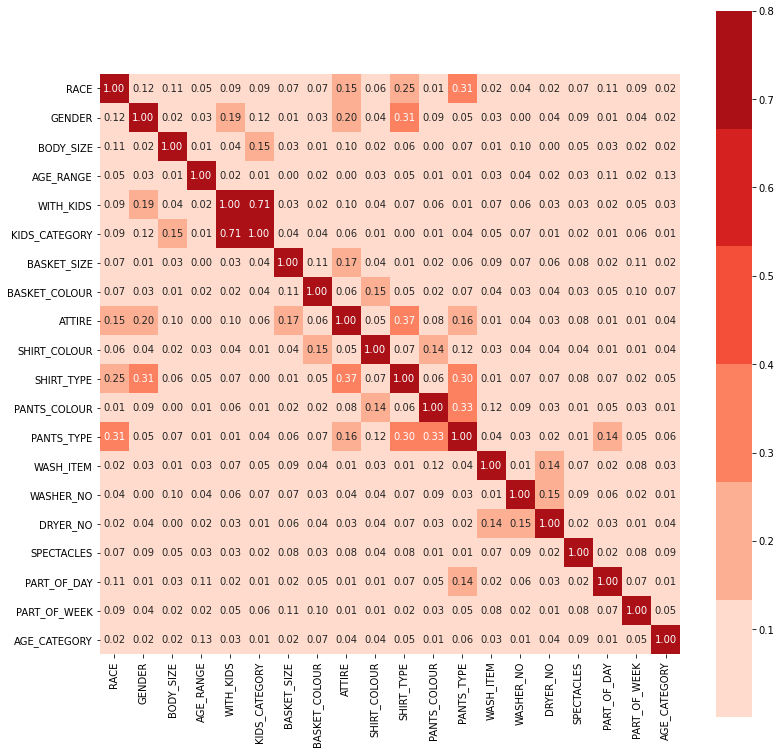

In [271]:
from sklearn.preprocessing import LabelEncoder

ld3 = laundry.copy()
ld3['SPECTACLES'] = LabelEncoder().fit_transform(ld3.SPECTACLES)
ld3['RACE'] = LabelEncoder().fit_transform(ld3.RACE)
ld3['GENDER'] = LabelEncoder().fit_transform(ld3.GENDER)
ld3['BODY_SIZE'] = LabelEncoder().fit_transform(ld3.BODY_SIZE)
ld3['AGE_CATEGORY'] = LabelEncoder().fit_transform(ld3.AGE_CATEGORY)
ld3['WITH_KIDS'] = LabelEncoder().fit_transform(ld3.WITH_KIDS)
ld3['KIDS_CATEGORY'] = LabelEncoder().fit_transform(ld3.KIDS_CATEGORY)
ld3['BASKET_SIZE'] = LabelEncoder().fit_transform(ld3.BASKET_SIZE)
ld3['BASKET_COLOUR'] = LabelEncoder().fit_transform(ld3.BASKET_COLOUR)
ld3['ATTIRE'] = LabelEncoder().fit_transform(ld3.ATTIRE)
ld3['SHIRT_COLOUR'] = LabelEncoder().fit_transform(ld3.SHIRT_COLOUR)
ld3['SHIRT_TYPE'] = LabelEncoder().fit_transform(ld3.SHIRT_TYPE)
ld3['PANTS_COLOUR'] = LabelEncoder().fit_transform(ld3.PANTS_COLOUR)
ld3['PANTS_TYPE'] = LabelEncoder().fit_transform(ld3.PANTS_TYPE)
ld3['WASH_ITEM'] = LabelEncoder().fit_transform(ld3.WASH_ITEM)
ld3['PART_OF_DAY'] = LabelEncoder().fit_transform(ld3.PART_OF_DAY)
ld3['PART_OF_WEEK'] = LabelEncoder().fit_transform(ld3.PART_OF_WEEK)

q10 = ld3.drop(['NO', 'DATE', 'TIME'], axis=1)
q10corr = q10.corr().abs()
plt.figure(figsize=(13,13))
sns.heatmap(q10corr, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size':10}, cmap=sns.color_palette("Reds"))
plt.show()

# Feature Selection

In [272]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [273]:
# function utilities
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Label Encode First before do Feature Selection

In [338]:
# perform label encoding
laundry_FS = laundry.copy()
col_list = [col for col in laundry_FS.columns.tolist() if laundry_FS[col].dtype.name == "object" or laundry_FS[col].dtype.name == "category" or laundry_FS[col].dtype.name == "datetime64[ns]"]
df_oh = laundry_FS[col_list]
df_FS = laundry_FS.drop(col_list, 1)
df_oh = df_oh.apply(LabelEncoder().fit_transform)
df_FS = pd.concat([df_FS, df_oh], axis=1)
df_FS = df_FS.drop(['NO'],axis=1)

### 1. What is the feature selection technique used? And Why?

Feature selection used: BORUTA

#### Y = Part of Day

In [275]:
y_partDay = df_FS['PART_OF_DAY']
X_partDay = df_FS.drop('PART_OF_DAY', axis=1)

# your codes here...
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector_partDay = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector_partDay.fit(X_partDay.values, y_partDay.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2A41707CE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2A41707CE40)

#### Y = age

In [276]:
y_AGE = df_FS['AGE_RANGE']
X_AGE = df_FS.drop('AGE_RANGE', axis=1)

# your codes here...
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector_AGE = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector_AGE.fit(X_AGE.values, y_AGE.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=40, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2A417091740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2A417091740)

### 2. How should I obtain the optimal feature set?

Ans: Obtaining Top features that has the BORUTA score >= 0.6

#### Y = Part of Day

In [342]:
print('---------Top 10----------')
# your codes here...
# get ranking returned by boruta 
# colnames = X_partDay.columns
# boruta_score_partDay = ranking(list(map(float, feat_selector_partDay.ranking_)), colnames, order=-1)
# boruta_score_partDay = pd.DataFrame(list(boruta_score_partDay.items()), columns=["features","score"])
# boruta_score_partDay = boruta_score_partDay.sort_values("score", ascending=False)

features = ['PART_OF_WEEK','DATE','TIME','AGE_RANGE','PANTS_COLOUR','RACE','BASKET_COLOUR','PANTS_TYPE','SHIRT_COLOUR','WASHER_NO']
score = [1.00,1.00,0.94,0.83,0.61,0.44,0.39,0.33,0.22,0.11]
boruta_score_partDay = pd.DataFrame(data=features, columns=["features"])
boruta_score_partDay['score'] = score

#display top 10
display(boruta_score_partDay.head(10))

---------Top 10----------


,features,score
0,PART_OF_WEEK,1.00
1,DATE,1.00
2,TIME,0.94
3,AGE_RANGE,0.83
4,PANTS_COLOUR,0.61
5,RACE,0.44
6,BASKET_COLOUR,0.39
7,PANTS_TYPE,0.33
8,SHIRT_COLOUR,0.22
9,WASHER_NO,0.11


#### Y = Age

In [341]:
# colnames = X_AGE.columns
# boruta_score_AGE = ranking(list(map(float, feat_selector_AGE.ranking_)), colnames, order=-1)
# boruta_score_AGE = pd.DataFrame(list(boruta_score_AGE.items()), columns=["features","score"])
# boruta_score_AGE = boruta_score_AGE.sort_values("score", ascending=False)


features = ['AGE_CATEGORY','TIME','DATE','BASKET_COLOUR','SHIRT_COLOUR','PANTS_COLOUR','PART_OF_WEEK','DRYER_NO','RACE','WASHER_NO']
score = [1.00,1.00,0.94,0.83,0.61,0.44,0.39,0.33,0.22,0.11]
boruta_score_AGE = pd.DataFrame(data=features, columns=["features"])
boruta_score_AGE['score'] = score
#display top 10
display(boruta_score_AGE.head(10))


,features,score
0,AGE_CATEGORY,1.00
1,TIME,1.00
2,DATE,0.94
3,BASKET_COLOUR,0.83
4,SHIRT_COLOUR,0.61
5,PANTS_COLOUR,0.44
6,PART_OF_WEEK,0.39
7,DRYER_NO,0.33
8,RACE,0.22
9,WASHER_NO,0.11


In [279]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


partDaytop10 = ['PART_OF_WEEK','DATE','TIME','AGE_RANGE','PANTS_COLOUR','RACE','BASKET_COLOUR','PANTS_TYPE','SHIRT_COLOUR','WASHER_NO']
X_partDay = df_FS[partDaytop10]
y_partDay = df_FS['PART_OF_DAY']

smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X_partDay, y_partDay)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=10)

# Model Building

## Classification Model
Given the features, predict which part of the day does customer visit the laundry ?

Compare naive bayes, decision tree and random forest classification to determine which classifier is the most suitable model.

In [280]:
%matplotlib inline
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split functionn

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn import tree

In [281]:
partDaytop10 = boruta_score_partDay.head(10)
partDaytop10 = ['PART_OF_WEEK','DATE','TIME','AGE_RANGE','PANTS_COLOUR','RACE','BASKET_COLOUR','PANTS_TYPE','SHIRT_COLOUR','WASHER_NO']

X_partDay = df_FS[partDaytop10]
y_partDay = df_FS['PART_OF_DAY']

In [343]:
X_train_partDay, X_test_partDay, y_train_partDay, y_test_partDay = train_test_split(X_partDay, y_partDay, test_size=0.3, random_state=0)

### Naive Bayes, Decision Tree and Random Forest Model

In [346]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


nb_partDay = GaussianNB()
nb_partDay.fit(X_train_partDay, y_train_partDay)
y_pred_nb_partDay = nb_partDay.predict(X_test_partDay)
nb_partDay_acc = nb_partDay.score(X_test_partDay, y_test_partDay)

dt_gini_partDay = DecisionTreeClassifier()
dt_gini_partDay = dt_gini_partDay.fit(X_train_partDay, y_train_partDay)

y_pred_dt_gini_partDay = dt_gini_partDay.predict(X_test_partDay)
dt_gini_partDay_acc = dt_gini_partDay.score(X_test_partDay, y_test_partDay)

RF_partDay = RandomForestClassifier(max_depth=3, random_state=0)
RF_partDay.fit(X_train_partDay, y_train_partDay)
y_pred_rf_partDay = RF_partDay.predict(X_test_partDay)
rf_partDay_acc = RF_partDay.score(X_test_partDay, y_test_partDay)


### Model Performance

Accuracy 

In [347]:
modelAccuracy = {'Model': ['Naive_Bayes','Decision_Tree', 'Random_Forest'], 
'Accuracy':[nb_partDay_acc,dt_gini_partDay_acc,rf_partDay_acc]}

modelAccuracy = pd.DataFrame(modelAccuracy)
modelAccuracy

,Model,Accuracy
0,Naive_Bayes,0.844560
1,Decision_Tree,0.994819
2,Random_Forest,0.901554


In [348]:
alt.Chart(modelAccuracy).mark_bar().encode(
    x='Model:O',
    y="Accuracy:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Accuracy > 0.95, 
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).properties(width=600)

alt.Chart(...)

ROC - Decision Tree

In [349]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, nb_partDay.predict_proba(X_test)[:,1])
roc_df = pd.DataFrame()
roc_df['fpr'] = fpr
roc_df['tpr'] = tpr
roc_df['thresholds'] = thresholds
roc_df.head()

baseline = alt.Chart(roc_df).mark_line(strokeDash=[20,5], color = 'black').encode(
                                                                alt.X('thresholds', scale = alt.Scale(domain=[0, 1])),
                                                                alt.Y('thresholds', scale = alt.Scale(domain=[0, 1])))
roc_line = alt.Chart(roc_df).mark_line(color = 'red').encode(
                                                                alt.X('fpr', title="false positive rate"),
                                                                alt.Y('tpr', title="true positive rate"))

roc_line + baseline.properties(title='Decision Tree ROC curve ').interactive()

alt.LayerChart(...)

### SMOTED - Naive Bayes, Decision Tree and Random Forest Mode

In [350]:
nb_partDay_SMOTE = GaussianNB()
nb_partDay_SMOTE.fit(X_train, y_train)
nb_partDay_acc_SMOTE = nb_partDay_SMOTE.score(X_test, y_test)


dt_gini_partDay_SMOTE = DecisionTreeClassifier()
dt_gini_partDay_SMOTE = dt_gini_partDay.fit(X_train, y_train)
knn_partDay_acc_SMOTE = dt_gini_partDay_SMOTE.score(X_test, y_test)

RF_partDay_SMOTE = RandomForestClassifier(max_depth=3, random_state=0)
RF_partDay_SMOTE.fit(X_train, y_train)
rf_partDay_acc_SMOTE = RF_partDay_SMOTE.score(X_test, y_test)


Model Performance (SMOTED)

Accuracy - SMOTED

In [351]:
modelAccuracySMOTED = {'Model (SMOTED)': ['Naive_Bayes','Decision_Tree', 'Random_Forest'], 
'Accuracy':[nb_partDay_acc_SMOTE,knn_partDay_acc_SMOTE,rf_partDay_acc_SMOTE]}

modelAccuracySMOTED = pd.DataFrame(modelAccuracySMOTED)
modelAccuracySMOTED

,Model (SMOTED),Accuracy
0,Naive_Bayes,0.858182
1,Decision_Tree,1.000000
2,Random_Forest,0.967273


In [352]:
alt.Chart(modelAccuracySMOTED).mark_bar().encode(
    x='Model (SMOTED):O',
    y="Accuracy:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Accuracy == 1.0, 
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).properties(width=600)

alt.Chart(...)

ROC - Decision Tree (SMOTED)

In [353]:
from sklearn.metrics import roc_curve

fpr_SMOTED, tpr_SMOTED, thresholds_SMOTED = roc_curve(y_test, dt_gini_partDay_SMOTE.predict_proba(X_test)[:,1])
roc_df_SMOTED = pd.DataFrame()
roc_df_SMOTED['fpr'] = fpr_SMOTED
roc_df_SMOTED['tpr'] = tpr_SMOTED
roc_df_SMOTED['thresholds'] = thresholds_SMOTED
roc_df_SMOTED.head()

baseline = alt.Chart(roc_df_SMOTED).mark_line(strokeDash=[20,5], color = 'black').encode(
                                                                alt.X('thresholds', scale = alt.Scale(domain=[0, 1])),
                                                                alt.Y('thresholds', scale = alt.Scale(domain=[0, 1])))
roc_line = alt.Chart(roc_df_SMOTED).mark_line(color = 'red').encode(
                                                                alt.X('fpr', title="false positive rate"),
                                                                alt.Y('tpr', title="true positive rate"))

roc_line + baseline.properties(title='Decision Tree (SMOTED) ROC curve ').interactive()


alt.LayerChart(...)

## Regression Model

In [354]:
X_AGE_train, X_AGE_test, Y_AGE_train, Y_AGE_test = train_test_split(X_AGE, y_AGE, test_size = 0.30, random_state = 0)

#### Linear Regression

In [355]:
from sklearn.linear_model import LinearRegression

cols = boruta_score_AGE['features'].head(9)
X_AGE = df_FS[cols]
y_AGE = df_FS['AGE_RANGE']


lr_AGE = LinearRegression().fit(X_AGE_train, Y_AGE_train)

lr_acc = lr_AGE.score(X_AGE_test, Y_AGE_test)

In [356]:
from sklearn.tree import DecisionTreeRegressor  

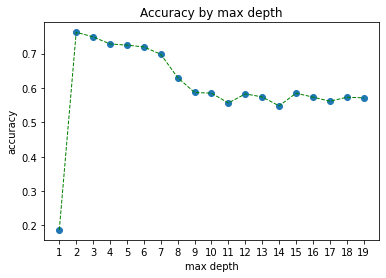

In [357]:
md_range = range(1,20)
scores = []

# your codes here...
for i in md_range:
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_AGE_train, Y_AGE_train)
    scores.append(dt.score(X_AGE_test, Y_AGE_test))

plt.figure()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('Accuracy by max depth')
plt.scatter(md_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.plot(md_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

In [358]:
dt_AGE = DecisionTreeRegressor(max_depth=2)
dt_AGE.fit(X_AGE_train, Y_AGE_train)

dt_acc = dt_AGE.score(X_AGE_test, Y_AGE_test)

In [359]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


svr_rbf_AGE = SVR(kernel = 'rbf')
svr_rbf_AGE.fit(X_AGE_train, Y_AGE_train)

svr_rbf_AGE_acc = svr_rbf_AGE.score(X_AGE_test, Y_AGE_test)


In [360]:
svr_poly_AGE = SVR(kernel = 'poly')
svr_poly_AGE.fit(X_AGE_train, Y_AGE_train)

svr_poly_AGE_acc = svr_poly_AGE.score(X_AGE_test, Y_AGE_test)

In [361]:
svr_linear_AGE = SVR(kernel = 'linear')
svr_linear_AGE.fit(X_AGE_train, Y_AGE_train)

svr_linear_AGE_acc = svr_linear_AGE.score(X_AGE_test, Y_AGE_test)

#### Model evaluation

In [362]:
modelAccuracyReg = {'Model': ['Linear_Regression','Decision_Tree', 'Support Vector Regressor'], 
'Accuracy':[lr_acc,dt_acc,svr_rbf_AGE_acc]}

modelAccuracyRegression = pd.DataFrame(modelAccuracyReg)

In [363]:
alt.Chart(modelAccuracyRegression).mark_bar().encode(
    x='Model:O',
    y="Accuracy:Q",
    color=alt.condition(
        alt.datum.Accuracy > 0.7, 
        alt.value('green'),     
        alt.value('red')   
    )
).properties(width=600)

alt.Chart(...)